<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/Copia_de_Segundo_Parcial_PPpCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segundo parcial

-Alday Martínez, Francia Aide

-Castañeda Mora, Carlos

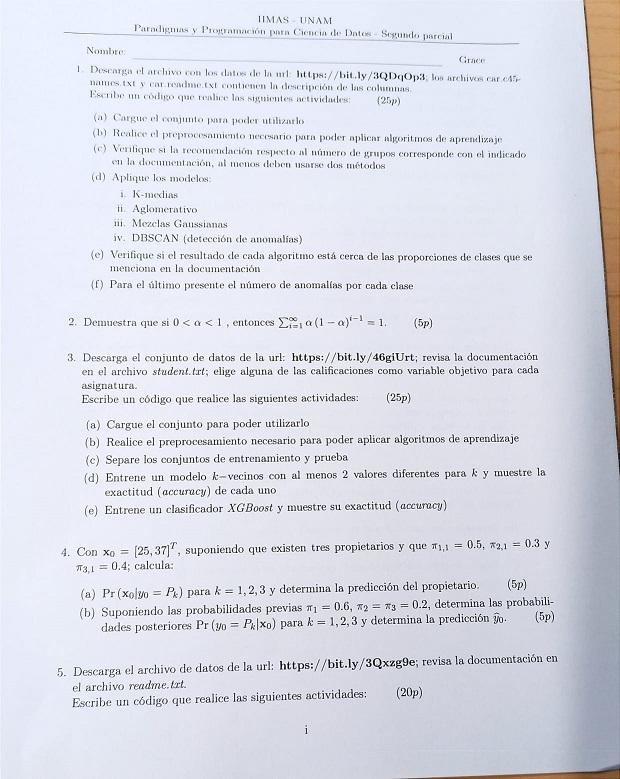

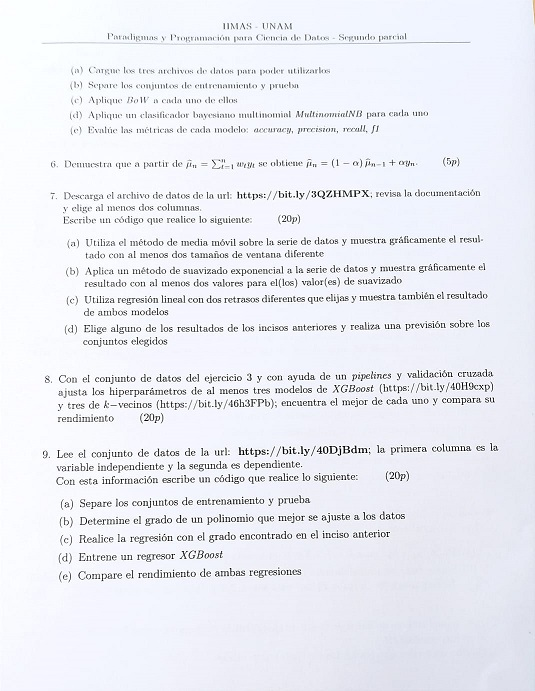

##Ejercicio1 car.c45

###a)cargar los datos

In [ ]:
import pandas as pd
import numpy as np

bd_sucia = pd.read_csv('car.data.csv')
bd_sucia.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
columns = bd_sucia.columns
columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

###b)Preprocesamiento  

In [ ]:
bd = bd_sucia[columns[0]].map({"vhigh":3, "high":2, "med":1, "low":0})

bd = np.dstack((bd, bd_sucia[columns[1]].map({"vhigh":3, "high":2, "med":1, "low":0})))

bd = np.dstack((bd, bd_sucia[columns[2]].map({"5more":5, "2":2, "3":3, "4":4 })))

bd = np.dstack((bd, bd_sucia[columns[3]].map({"more":5, "2":2, "4":4})))

bd = np.dstack((bd, bd_sucia[columns[4]].map({ "big":2, "med":1, "small":0})))

bd = np.dstack((bd,bd_sucia[columns[5]].map({ "high":2, "med":1, "low":0})))
bd

array([[[3, 3, 2, 2, 0, 1],
        [3, 3, 2, 2, 0, 2],
        [3, 3, 2, 2, 1, 0],
        ...,
        [0, 0, 5, 5, 2, 0],
        [0, 0, 5, 5, 2, 1],
        [0, 0, 5, 5, 2, 2]]])

In [ ]:
y = bd_sucia[columns[6]].map({"vgood":3, "good":2, "acc":1, "unacc":0})
y

0       0
1       0
2       0
3       0
4       0
       ..
1722    2
1723    3
1724    0
1725    2
1726    3
Name: unacc, Length: 1727, dtype: int64

In [ ]:
bd = bd.reshape(1727, 6)

In [ ]:
bd.shape

(1727, 6)

###c)Verificar el número de clases

In [ ]:
from sklearn . preprocessing import normalize
bd_scaled = normalize ( bd )
bd_scaled

array([[0.57735027, 0.57735027, 0.38490018, 0.38490018, 0.        ,
        0.19245009],
       [0.54772256, 0.54772256, 0.36514837, 0.36514837, 0.        ,
        0.36514837],
       [0.57735027, 0.57735027, 0.38490018, 0.38490018, 0.19245009,
        0.        ],
       ...,
       [0.        , 0.        , 0.68041382, 0.68041382, 0.27216553,
        0.        ],
       [0.        , 0.        , 0.67419986, 0.67419986, 0.26967994,
        0.13483997],
       [0.        , 0.        , 0.65653216, 0.65653216, 0.26261287,
        0.26261287]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

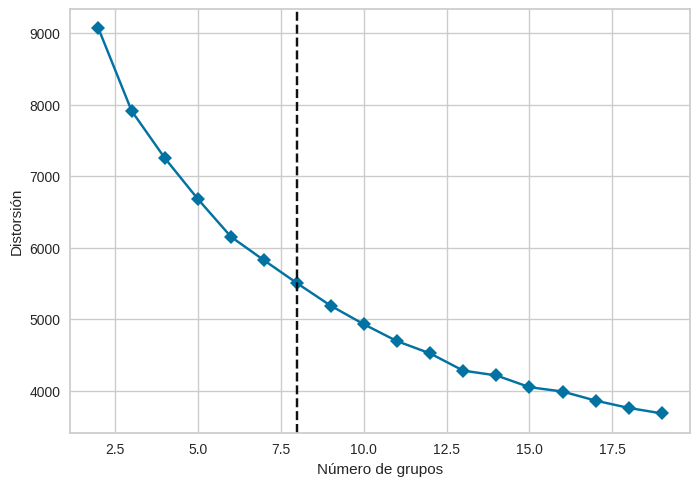

In [ ]:
from sklearn.cluster import  KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

visualizer = KElbowVisualizer(KMeans(), k=(2,20), timings=False)
visualizer.fit(bd)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

En el documento indica que el número de clases corresponde a 4, vgood, good, acc y unacc. Utilizando la gráfica del codo podemos observar que 4 clases está por detrás del número de clases que se encontró. El algoritmo marca que encontró el codo en 8 clases.  Sinn embargo, podemos observar que en 15 clases es donde empieza a aplanarse la curva.

Para el caso de estudio, no es necesario considerar más de 4 clases, pues ese es el número designado. Sin embargo, es necesario considrar que es prudente revisar las clases, con la finalidad de tener infromación más clara de los automóviles.

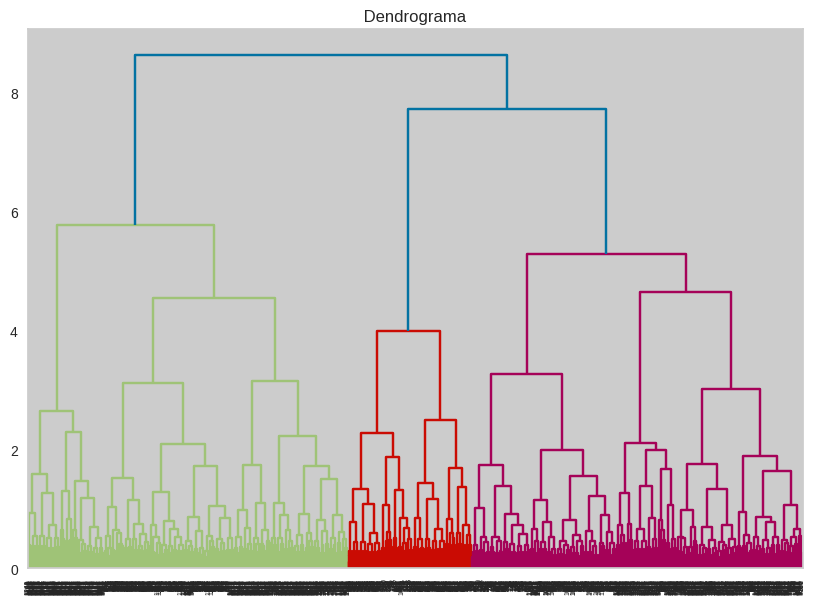

In [ ]:
import scipy . cluster . hierarchy as shc
plt . figure ( figsize =(10 , 7))
plt . title (" Dendrograma ")
dend = shc . dendrogram ( shc . linkage ( bd_scaled , method = 'ward'))

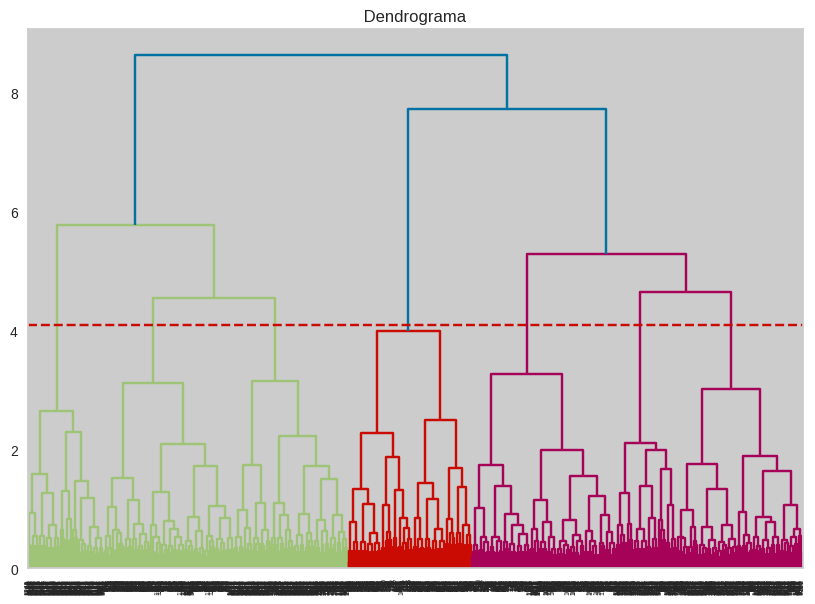

In [ ]:
plt . figure ( figsize =(10 , 7))
plt . title (" Dendrograma ")
dend = shc.dendrogram ( shc.linkage ( bd_scaled , method = 'ward'))
plt . axhline (y =4.1 , color = 'r', linestyle = '--')

Revisando el dendograma, podemos observar que la línea vértical con mayor distancia es la segunda línea azul, esta termina en cuatro, por lo que ahí es donde se colocará la línea para identificar las clases. En este caso, se contaron 7 clases distintas. Un número muy parecido al obtenido por k-elbow. Pero que también es muy distinto al dado por el problema.

###d)Aplica los modelos

In [ ]:
porcent = [70.023, 22.222, 3.993, 3.762]

####Kmeans

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn . cluster import KMeans

kmeans_pipeline = Pipeline(steps=[('PREPROCESAMIENTO', StandardScaler()),
                              ('MODEL', KMeans(4))
                             ])
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)
scoresKmeans = -1 * cross_val_score(kmeans_pipeline, bd, y,
                              cv=kf,
                              scoring='neg_mean_absolute_error', verbose=1000, error_score='raise')



[CV] START .....................................................................


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END ............................... score: (test=-0.884) total time=   0.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.8s
[CV] START .....................................................................


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END ............................... score: (test=-0.931) total time=   0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.1s
[CV] START .....................................................................


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END ............................... score: (test=-1.164) total time=   0.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.5s
[CV] START .....................................................................
[CV] END ............................... score: (test=-1.160) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Puntajes de CV: %s' % (scoresKmeans))
print('Exactitud de CV %.3f +- %.3f' % (np.mean(scoresKmeans), np.std(scoresKmeans)))

Puntajes de CV: [0.88425926 0.93055556 1.16435185 1.16009281]
Exactitud de CV 1.035 +- 0.128


In [ ]:
predicciones = kmeans_pipeline.fit_predict(X=bd)
predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [ ]:
unique, count = np.unique(predicciones, return_counts=True)
print(unique)
for i in range((len(unique))):
  print('Clase ',unique[i], ': \n\tNúmero de ocurrencias: ', count[i],'\n\tPorcentaje de clase calculado: ',
        (count[i]/len(predicciones))*100 ,'\n\tPorcentaje de clase esperado: ',porcent[i])

[0 1 2 3]
Clase  0 : 
	Número de ocurrencias:  528 
	Porcentaje de clase calculado:  30.573248407643312 
	Porcentaje de clase esperado:  70.023
Clase  1 : 
	Número de ocurrencias:  431 
	Porcentaje de clase calculado:  24.956572090330052 
	Porcentaje de clase esperado:  22.222
Clase  2 : 
	Número de ocurrencias:  384 
	Porcentaje de clase calculado:  22.23508975101332 
	Porcentaje de clase esperado:  3.993
Clase  3 : 
	Número de ocurrencias:  384 
	Porcentaje de clase calculado:  22.23508975101332 
	Porcentaje de clase esperado:  3.762


####Aglomerativo

In [ ]:
from sklearn . cluster import AgglomerativeClustering
aglomerativo_pipeline = Pipeline(steps=[('PREPROCESAMIENTO', StandardScaler()),
                              ('MODEL', AgglomerativeClustering( n_clusters = 4 , affinity = 'euclidean',linkage ='ward'))
                             ])
y_h = aglomerativo_pipeline . fit_predict (bd )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
unique, count = np.unique(y_h, return_counts=True)
print(unique)
for i in range((len(unique))):
  print('Clase ',unique[i], ': \n\tNúmero de ocurrencias: ', count[i],'\n\tPorcentaje de clase calculado: ',
        (count[i]/len(predicciones))*100 ,'\n\tPorcentaje de clase esperado: ',porcent[i])

[0 1 2 3]
Clase  0 : 
	Número de ocurrencias:  464 
	Porcentaje de clase calculado:  26.86740011580776 
	Porcentaje de clase esperado:  70.023
Clase  1 : 
	Número de ocurrencias:  575 
	Porcentaje de clase calculado:  33.29473074696004 
	Porcentaje de clase esperado:  22.222
Clase  2 : 
	Número de ocurrencias:  400 
	Porcentaje de clase calculado:  23.161551823972207 
	Porcentaje de clase esperado:  3.993
Clase  3 : 
	Número de ocurrencias:  288 
	Porcentaje de clase calculado:  16.67631731325999 
	Porcentaje de clase esperado:  3.762


####Mezclas Gaussianas

In [ ]:
from sklearn.mixture import GaussianMixture
gaussmixture_pipeline = Pipeline(steps=[('PREPROCESAMIENTO', StandardScaler()),
                              ('MODEL', GaussianMixture(4, covariance_type='full', random_state=0))
                             ])

y_hat = gaussmixture_pipeline.fit_predict(bd)

In [ ]:
unique, count = np.unique(y_hat, return_counts=True)
print(unique)
for i in range((len(unique))):
  print('Clase ',unique[i], ': \n\tNúmero de ocurrencias: ', count[i],'\n\tPorcentaje de clase calculado: ',
        (count[i]/len(predicciones))*100 ,'\n\tPorcentaje de clase esperado: ',porcent[i])

[0 1 2 3]
Clase  0 : 
	Número de ocurrencias:  384 
	Porcentaje de clase calculado:  22.23508975101332 
	Porcentaje de clase esperado:  70.023
Clase  1 : 
	Número de ocurrencias:  384 
	Porcentaje de clase calculado:  22.23508975101332 
	Porcentaje de clase esperado:  22.222
Clase  2 : 
	Número de ocurrencias:  575 
	Porcentaje de clase calculado:  33.29473074696004 
	Porcentaje de clase esperado:  3.993
Clase  3 : 
	Número de ocurrencias:  384 
	Porcentaje de clase calculado:  22.23508975101332 
	Porcentaje de clase esperado:  3.762


####DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

dbscan = DBSCAN(eps=0.3, min_samples=20).fit(bd)
Counter(dbscan.labels_)

Counter({-1: 1727})

##Ejercicio 3)

Al colo

##Ejercicio 7)Serie de tiempo

###Carga de datos y preprocesamiento

In [ ]:
data=pd.read_csv('synthetic.data.txt', sep=',', header=None,)

In [ ]:
data.head()

0         1         2         3         4         5         6         7   \
0 NaN  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 NaN  0.000552  0.000387  0.000495  0.000564  0.000444  0.000485  0.000475   
2 NaN  0.001103  0.000775  0.000990  0.001127  0.000888  0.000971  0.000950   
3 NaN  0.001655  0.001162  0.001484  0.001690  0.001333  0.001456  0.001425   
4 NaN  0.002207  0.001549  0.001979  0.002254  0.001777  0.001942  0.001901   

         8         9         10  
0  0.000000  0.000000  0.000000  
1  0.000490  0.000503  0.000430  
2  0.000980  0.001006  0.000859  
3  0.001470  0.001509  0.001288  
4  0.001959  0.002012  0.001718

In [ ]:
data = data.iloc[:,1:]
data.head()

1         2         3         4         5         6         7   \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000552  0.000387  0.000495  0.000564  0.000444  0.000485  0.000475   
2  0.001103  0.000775  0.000990  0.001127  0.000888  0.000971  0.000950   
3  0.001655  0.001162  0.001484  0.001690  0.001333  0.001456  0.001425   
4  0.002207  0.001549  0.001979  0.002254  0.001777  0.001942  0.001901   

         8         9         10  
0  0.000000  0.000000  0.000000  
1  0.000490  0.000503  0.000430  
2  0.000980  0.001006  0.000859  
3  0.001470  0.001509  0.001288  
4  0.001959  0.002012  0.001718

Se eligiran las columnas 6 y 7.

In [ ]:
data = data.iloc[:,5:7]
data.head()

6         7
0  0.000000  0.000000
1  0.000485  0.000475
2  0.000971  0.000950
3  0.001456  0.001425
4  0.001942  0.001901

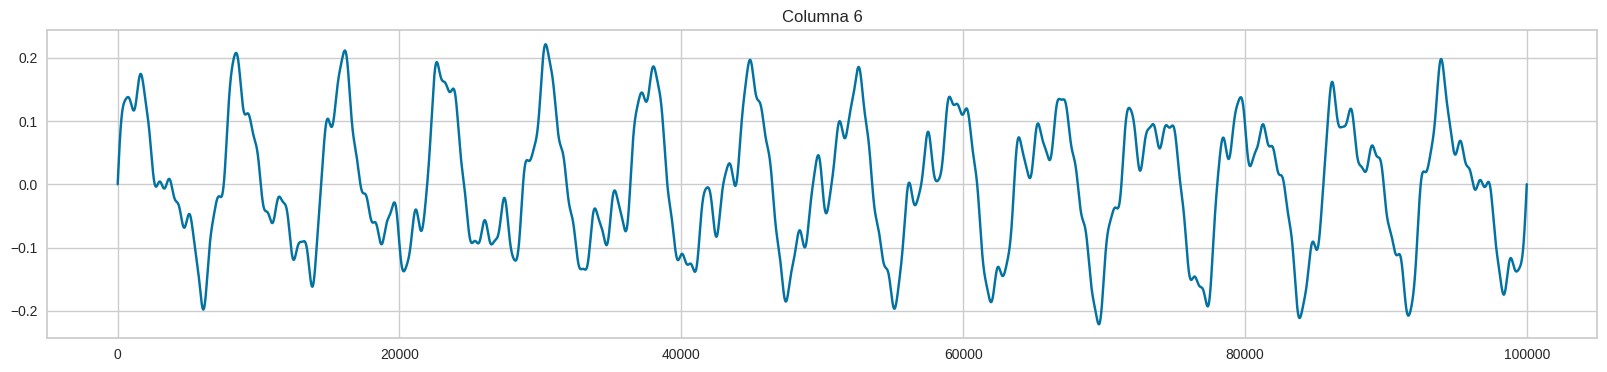

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(data[6])
plt.title('Columna 6')
plt.show()

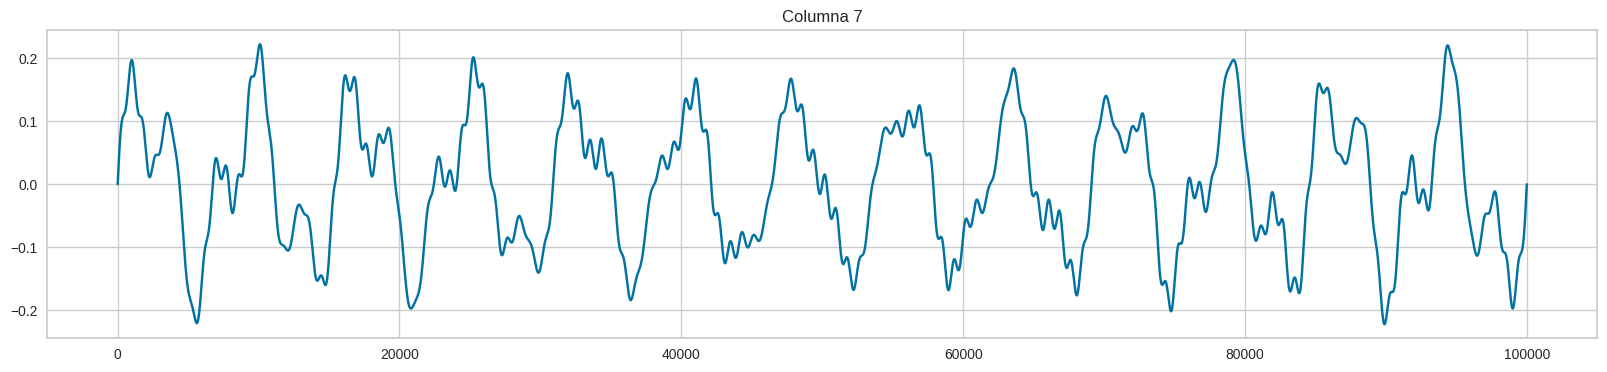

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(data[7])
plt.title('Columna 7')
plt.show()

###Media móvil

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true,y_pred):
  return np.mean(np.abs((y_true - y_pred)/y_true ))*100

def plot_moving_average(series,window,plot_intervals=False,
                        scale=1.96,plot_anomalies=False):
  '''
  series = dataframe con la serie de tiempo
  window = tamaño de la ventana
  plot_intervals = bandera para mostrar intervalos de confianza
  scale = escala para los intervalos de confianza
  plot_anomalies = bandera para mostrar las anomalias
  '''
  rolling_mean = series.rolling(window=window).mean() ## version de pandas para la media movil
  plt.figure(figsize=(20,6))
  plt.title('Media movil \ntamaño de la ventana ={}'.format(window))
  plt.plot(rolling_mean,'black',label='Tendencia por media movil')

  if plot_intervals:
    mae = mean_absolute_error(series[window:],rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    low_ = rolling_mean - (mae+scale*deviation)
    upp_ = rolling_mean + (mae+scale*deviation)
    plt.plot(upp_,'r--',label='Limite inferior/superior')
    plt.plot(low_,'r--')

  if plot_anomalies:
    anom = pd.DataFrame(index=series.index, columns=series.columns)
    anom[series<low_] = series[series<low_]
    anom[series>upp_] = series[series>upp_]
    plt.plot(anom,'ro',markersize=10)

  plt.plot(series[window:],label='Valores reales')
  plt.legend(loc='best')
  plt.xticks(rotation=30)

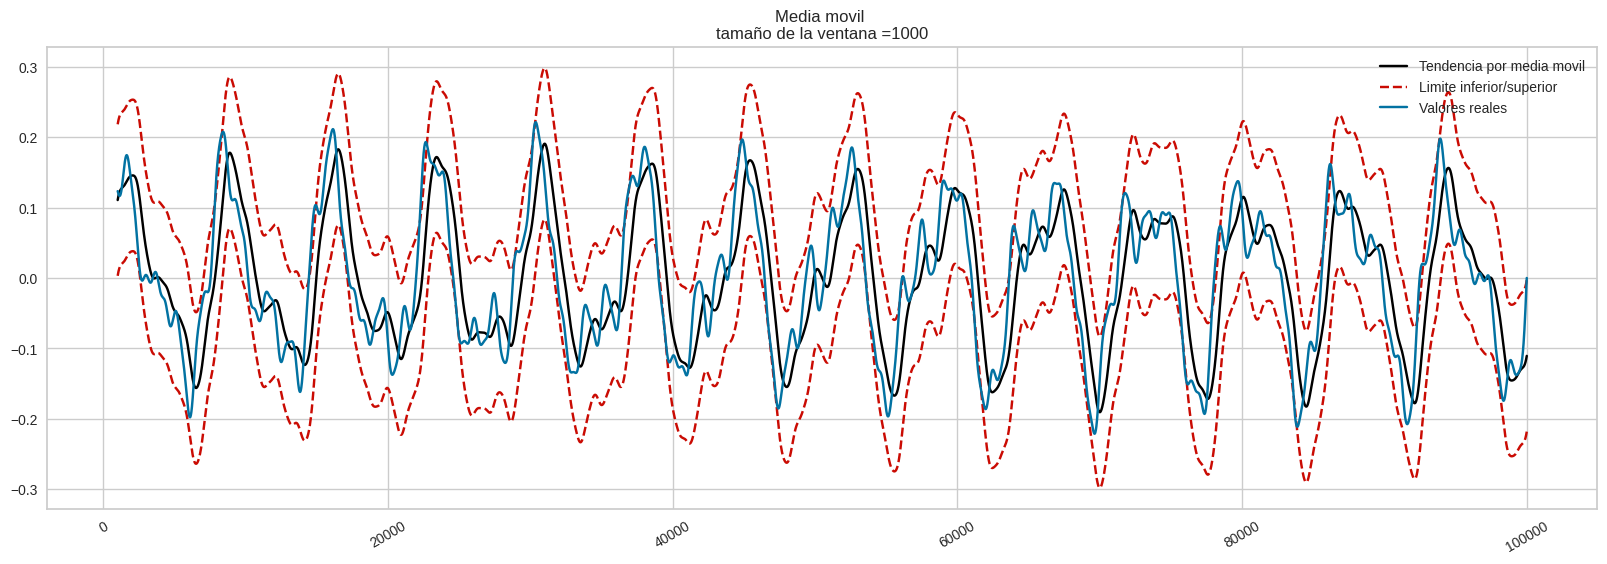

In [ ]:
plot_moving_average(data[6],1000,plot_intervals=True,scale=1)

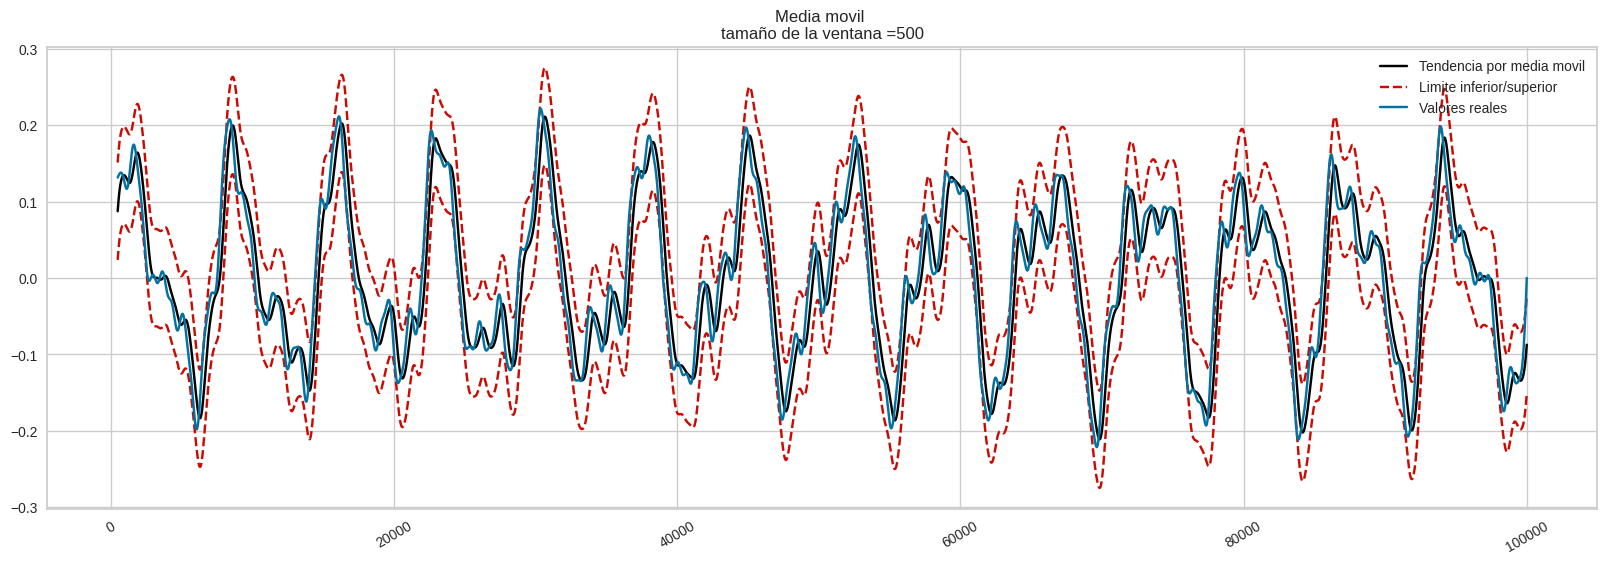

In [ ]:
plot_moving_average(data[6],500,plot_intervals=True,scale=1)

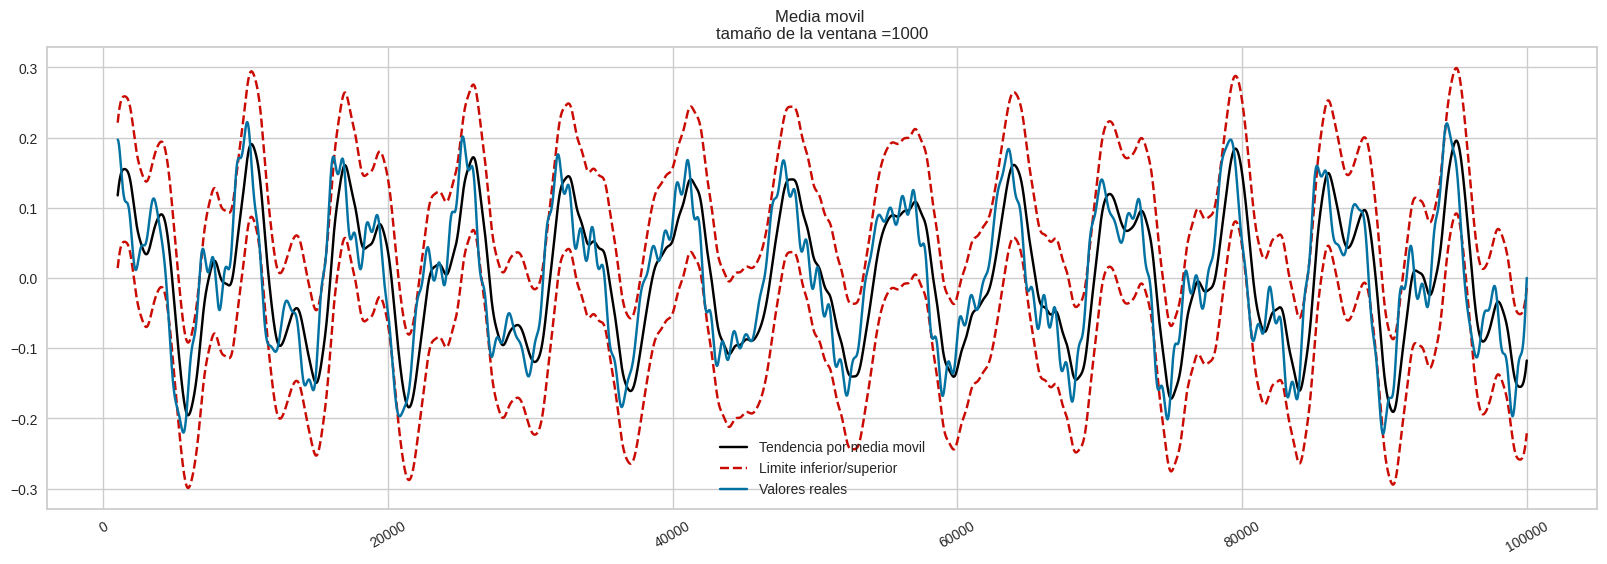

In [ ]:
plot_moving_average(data[7],1000,plot_intervals=True,scale=1)

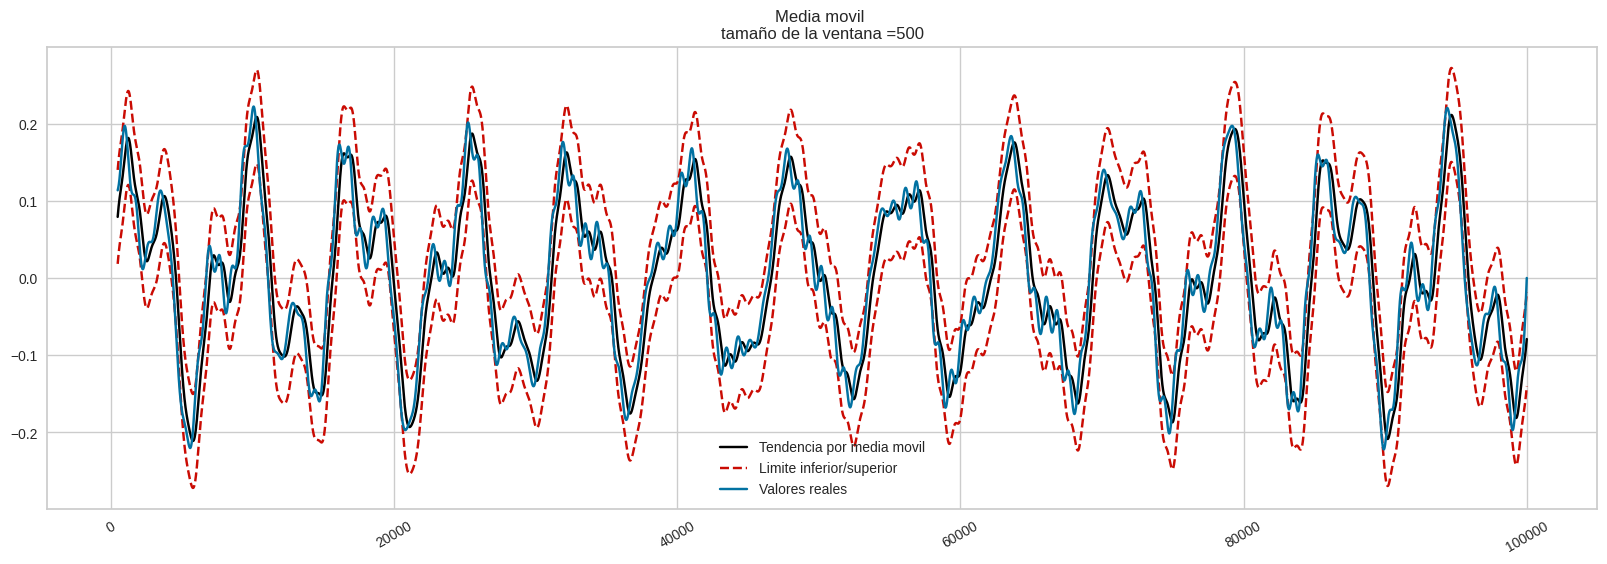

In [ ]:
plot_moving_average(data[7],500,plot_intervals=True,scale=1)

###Suavizado exponencial

In [ ]:
#Suavizado exponencial
def exponential_smoothing(series, alpha):
  """alpha: parámetro de suavizado (0.0 - 1.0)
  """
  result = [series[0]]
  for n in range(1, len(series)):
    result.append(alpha*series[n] + (1-alpha)*result[n-1])
  return result

In [ ]:
#Gráfica
def plot_exponential_smoothing(series, alphas):
  """Muestra el suavizado exponencial para diferentes valores de alpha
  alphas: lista de valores del parámetro
  """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,5))
    plt.plot(series.values, 'c', label='Real')
    for alpha in alphas:
      plt.plot(exponential_smoothing(series, alpha),
               label = 'Alpha= {}'.format(alpha))

      plt.legend(loc='best')
      plt.title('Suavizado exponencial')
      plt.grid(True)
      plt.axis('tight')
    plt.show()

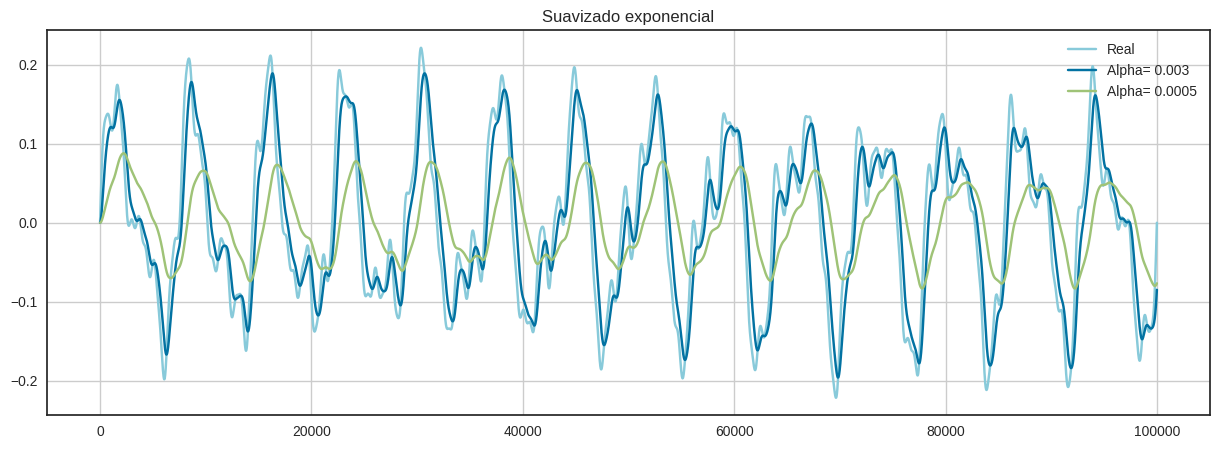

In [ ]:
plot_exponential_smoothing(data[6], [0.003, 0.0005])

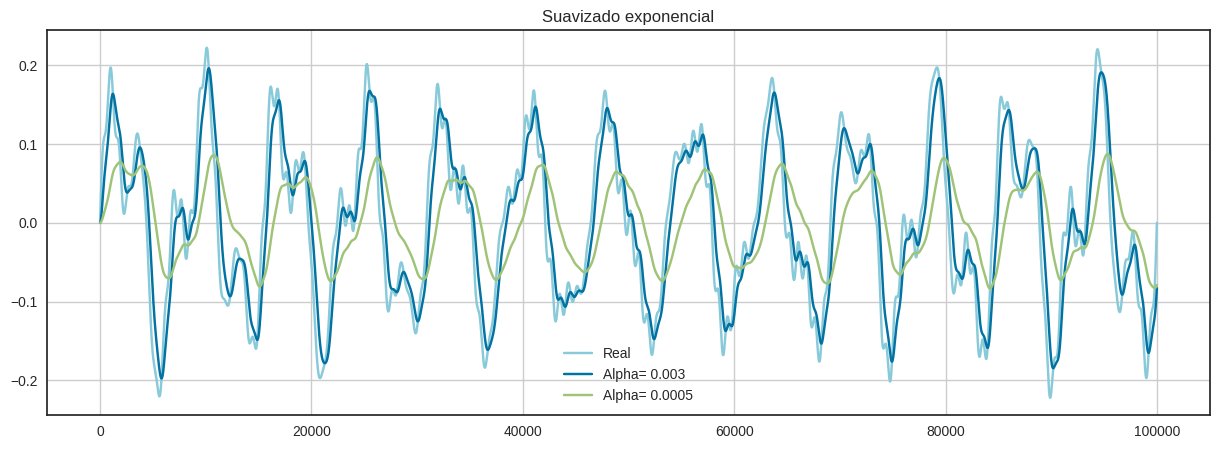

In [ ]:
plot_exponential_smoothing(data[7], [0.003, 0.0005])

In [ ]:
from pandas.core import series
#Suavizado exponencial ya implementado
from statsmodels.tsa.api import ExponentialSmoothing

def plot_exp(series, alpha):
  es1 = ExponentialSmoothing((series), seasonal_periods=12,
                             trend='add', seasonal='add').fit()
  #Pronóstico
  es2 = es1.forecast(len(series)//4)
  series.plot(kind='line', figsize=(20,5))
  es2.plot(kind='line')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


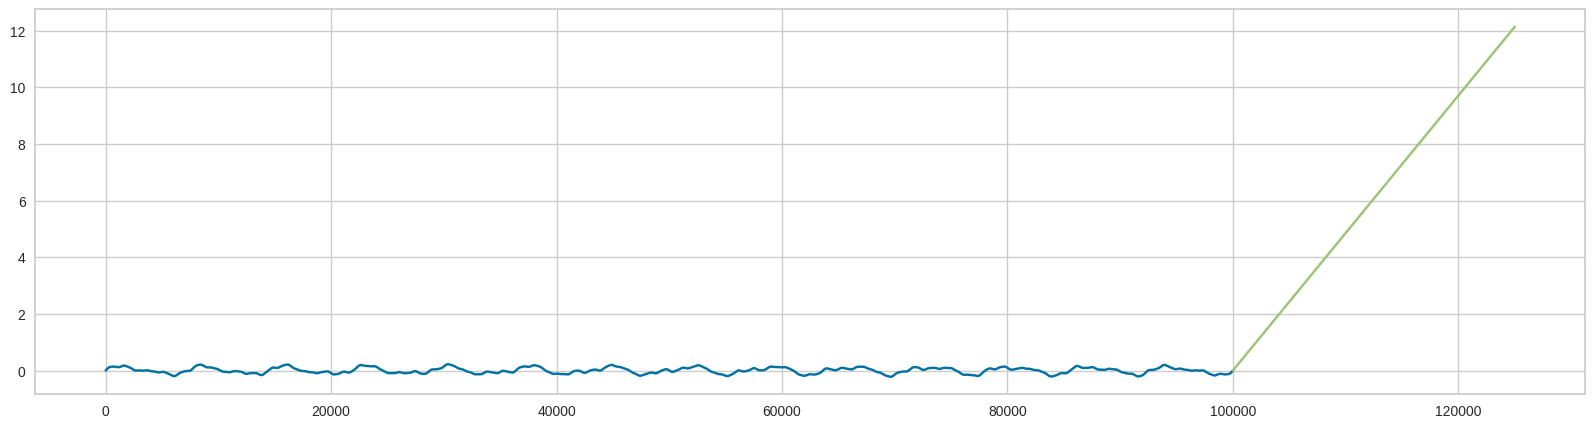

In [ ]:
plot_exp(data[6], 0.3)

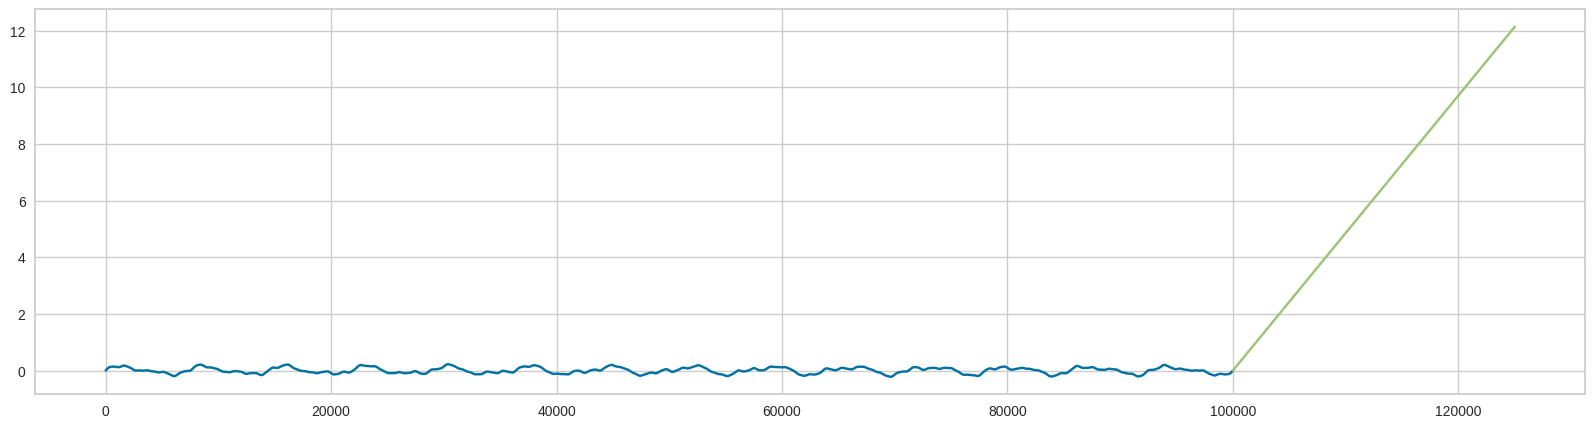

In [ ]:
plot_exp(data[6], 0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


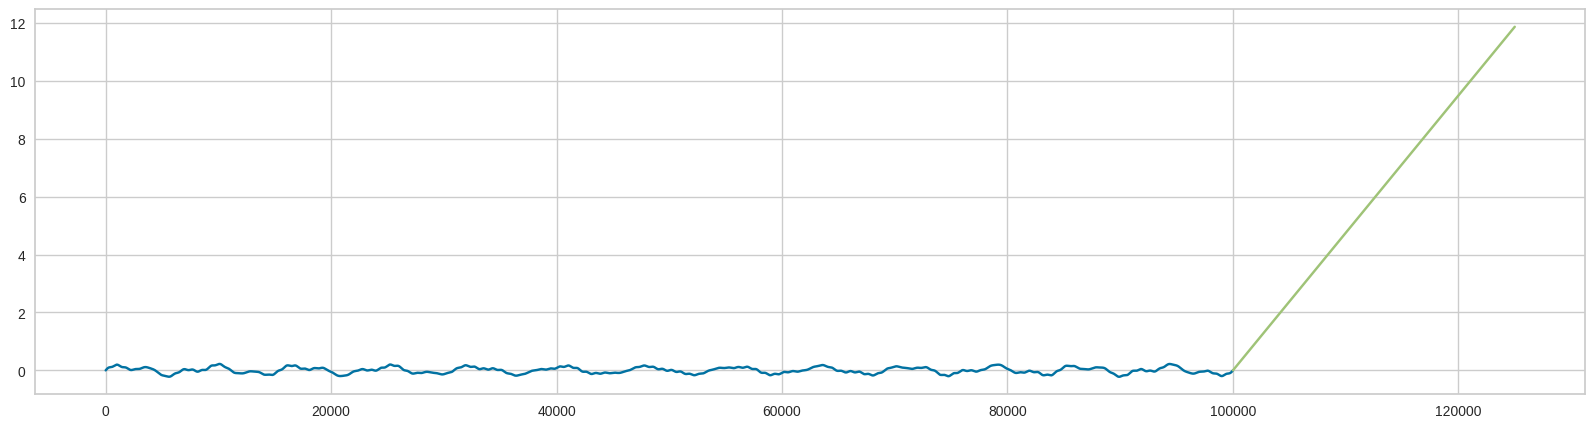

In [ ]:
plot_exp(data[7], 0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


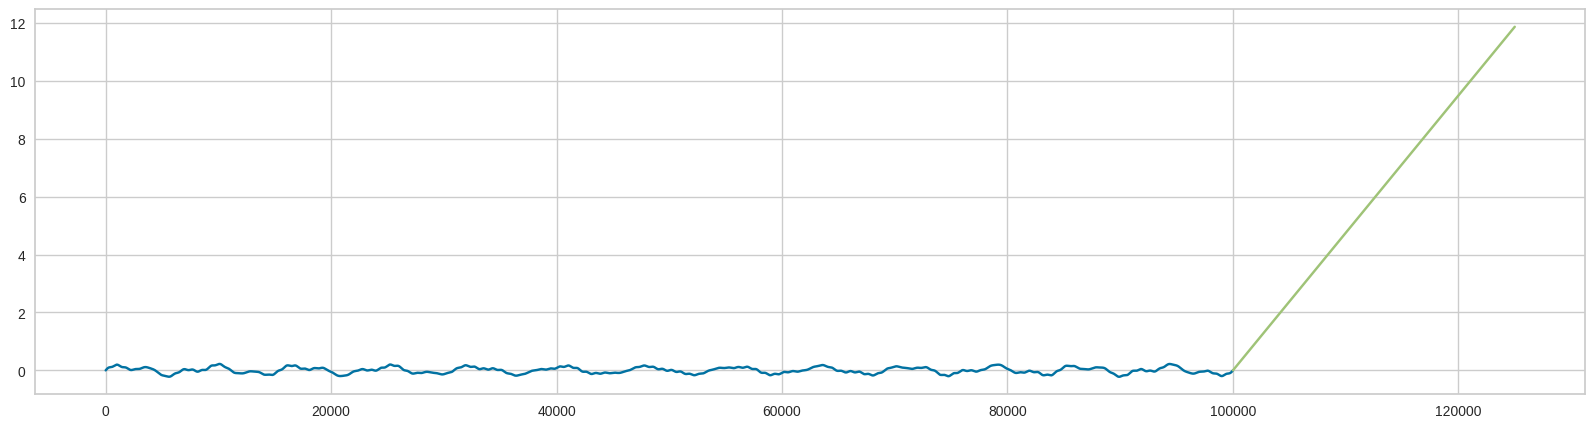

In [ ]:
plot_exp(data[7], 0.3)

###Regresión lineal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Estadísticas para Time Series
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
data1 = pd.DataFrame(data[6].copy())
data1.columns= ['y']
data1.head()
for i in range(6,25):
  data1['lag_{}'.format(i)] = data1.y.shift(i)
data1.head(10)

y     lag_6     lag_7     lag_8  lag_9  lag_10  lag_11  lag_12  \
0  0.000000       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
1  0.000485       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
2  0.000971       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
3  0.001456       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
4  0.001942       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
5  0.002427       NaN       NaN       NaN    NaN     NaN     NaN     NaN   
6  0.002912  0.000000       NaN       NaN    NaN     NaN     NaN     NaN   
7  0.003398  0.000485  0.000000       NaN    NaN     NaN     NaN     NaN   
8  0.003883  0.000971  0.000485  0.000000    NaN     NaN     NaN     NaN   
9  0.004368  0.001456  0.000971  0.000485    0.0     NaN     NaN     NaN   

   lag_13  lag_14  lag_15  lag_16  lag_17  lag_18  lag_19  lag_20  lag_21  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
9     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   lag_22  lag_23  lag_24  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  
5     NaN     NaN     NaN  
6     NaN     NaN     NaN  
7     NaN     NaN     NaN  
8     NaN     NaN     NaN  
9     NaN     NaN     NaN

In [ ]:
#Dividir el conjunto
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
#Time Series Cross Validation con 5 pliegues
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
def timeseries_train_test_split(X,y, test_size):
  test_index = int(len(X) * (1-test_size))
  X_train, y_train = X.iloc[:test_index], y.iloc[:test_index]
  X_test, y_test = X.iloc[test_index:], y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
#Preprocesamiento
y = data1.dropna().y
X = data1.dropna().drop(['y'], axis = 1)
#30% para pruebas
X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [ ]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import mean_absolute_error
def plot_lr_ts(model, X_train, X_test, y_train, y_test, scale = 1.96,
               plot_intervals=False, plot_anomalies=False):
  pred = model.predict(X_test)
  plt.figure(figsize=(15,7))
  plt.plot(pred, 'g', label='Predicción', linewidth=2)
  plt.plot(y_test.values, label='Real', linewidth=2)
  #p_i intervalos
  if plot_intervals:
    cv = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
    mae = cv.mean() * (-1)
    dev = cv.std()
    low = pred - (mae + scale*dev)
    upp = pred + (mae + scale*dev)
    plt.plot(low, 'r--', label='Límite inferior/superior', alpha=0.5)
    plt.plot(upp, 'r--', alpha=0.5)
  #p_a
  error = mean_absolute_error(pred, y_test)

  plt.title('Error absoluto promedio = {0:.3f}%'.format(error))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True)
  plt.show()

def plot_coefficients(model):
  coefs = pd.DataFrame(model.coef_, X_train.columns)
  coefs.columns=['coef']
  coefs['abs'] = coefs.coef.apply(np.abs)
  coefs = coefs.sort_values(by='abs', ascending=False).drop(['abs'], axis=1)
  plt.figure(figsize=(15,7))
  coefs.coef.plot(kind='bar')
  plt.grid(True, axis='y')
  plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyle='dashed')
  plt.show()

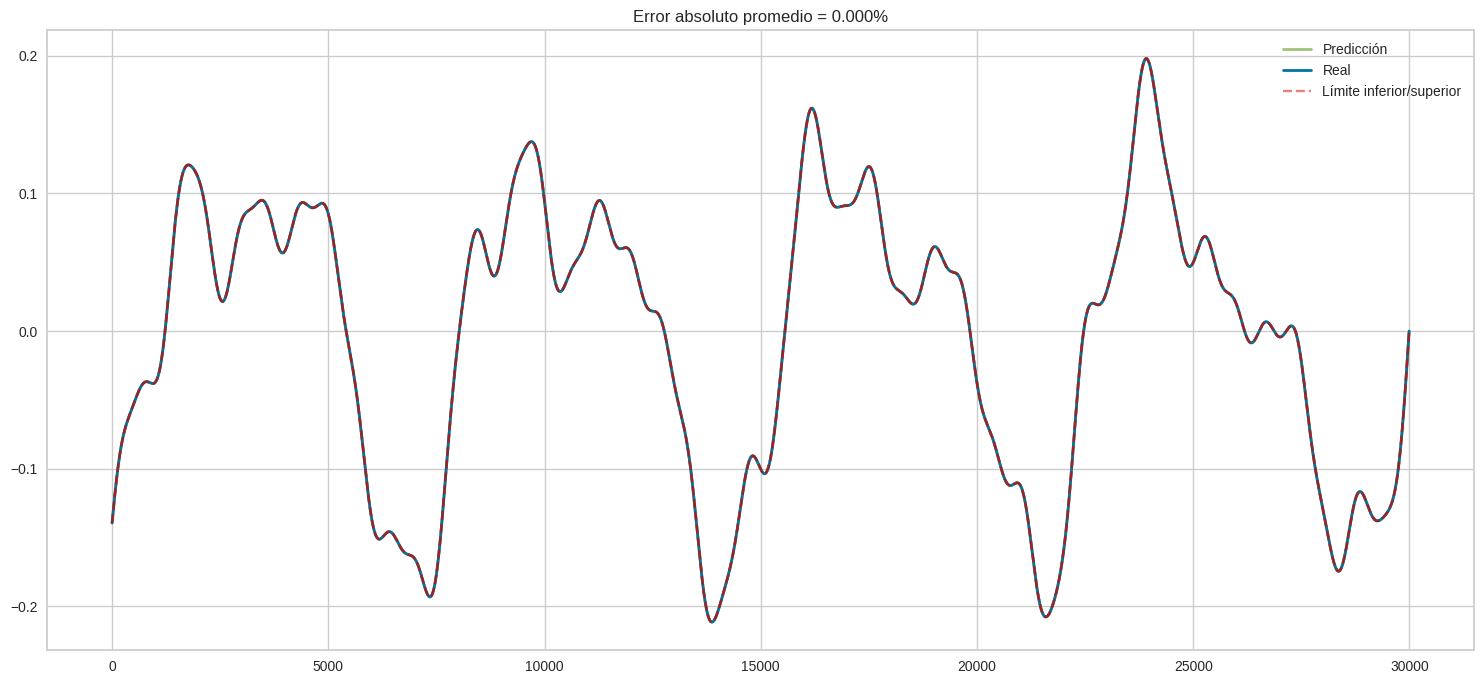

In [ ]:
plot_lr_ts(lr, X_train, X_test,y_train,y_test, plot_intervals=True)

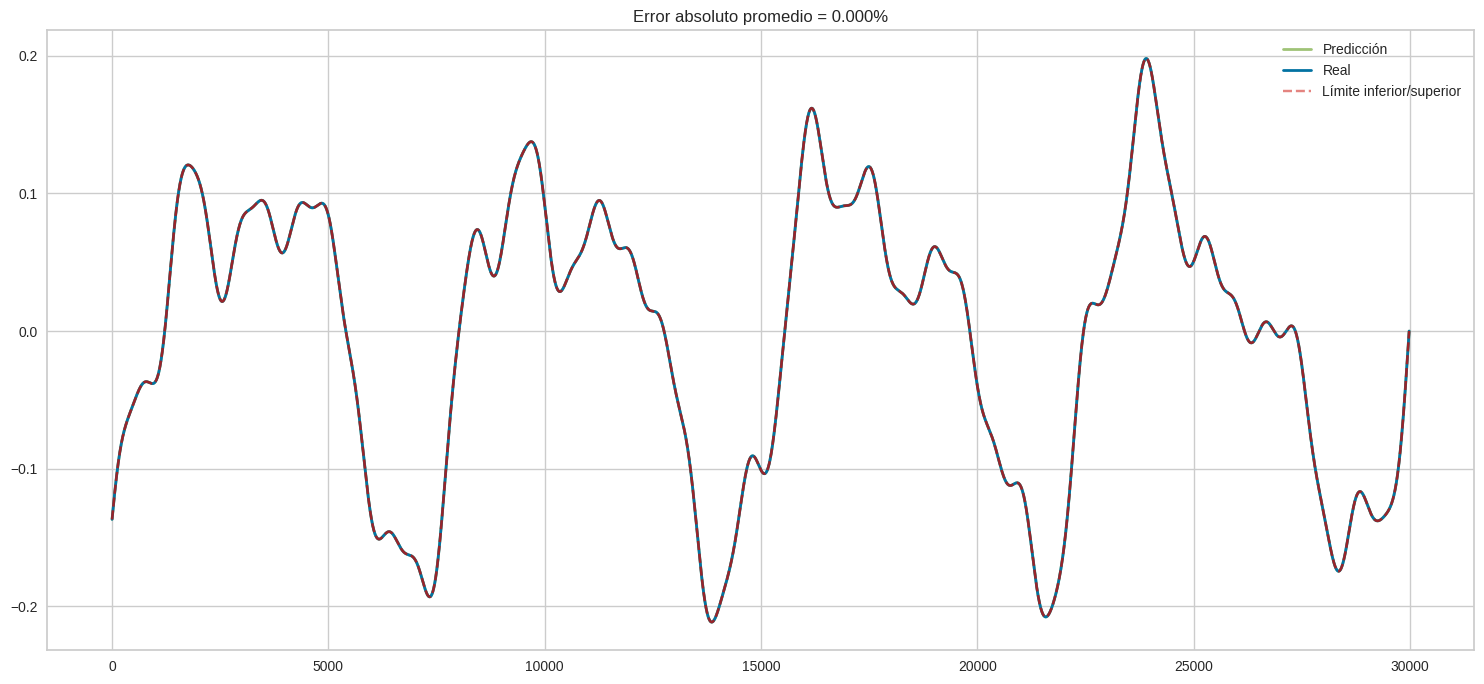

In [ ]:
data2 = pd.DataFrame(data[6].copy())
data2.columns= ['y']
data2.head()
for i in range(6,50):
  data2['lag_{}'.format(i)] = data2.y.shift(i)

tscv = TimeSeriesSplit(n_splits=5)
#Preprocesamiento
y = data2.dropna().y
X = data2.dropna().drop(['y'], axis = 1)
#30% para pruebas
X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,0.3)
lr2 = LinearRegression()
model = lr2.fit(X_train,y_train)
plot_lr_ts(lr2, X_train, X_test,y_train,y_test, plot_intervals=True)

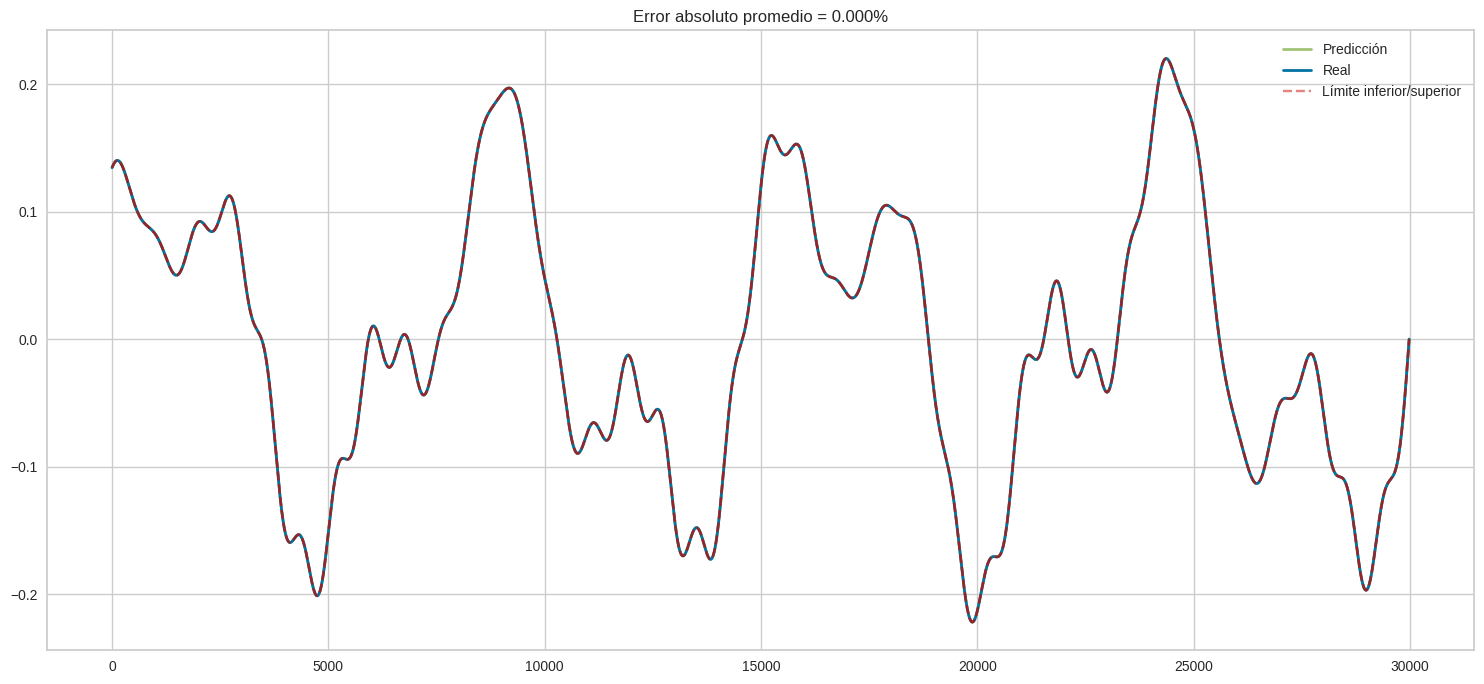

In [ ]:
data3 = pd.DataFrame(data[7].copy())
data3.columns= ['y']
for i in range(15,50):
  data3['lag_{}'.format(i)] = data3.y.shift(i)

tscv = TimeSeriesSplit(n_splits=5)
#Preprocesamiento
y = data3.dropna().y
X = data3.dropna().drop(['y'], axis = 1)
#30% para pruebas
X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,0.3)
lr3 = LinearRegression()
model = lr3.fit(X_train,y_train)
plot_lr_ts(lr3, X_train, X_test,y_train,y_test, plot_intervals=True)

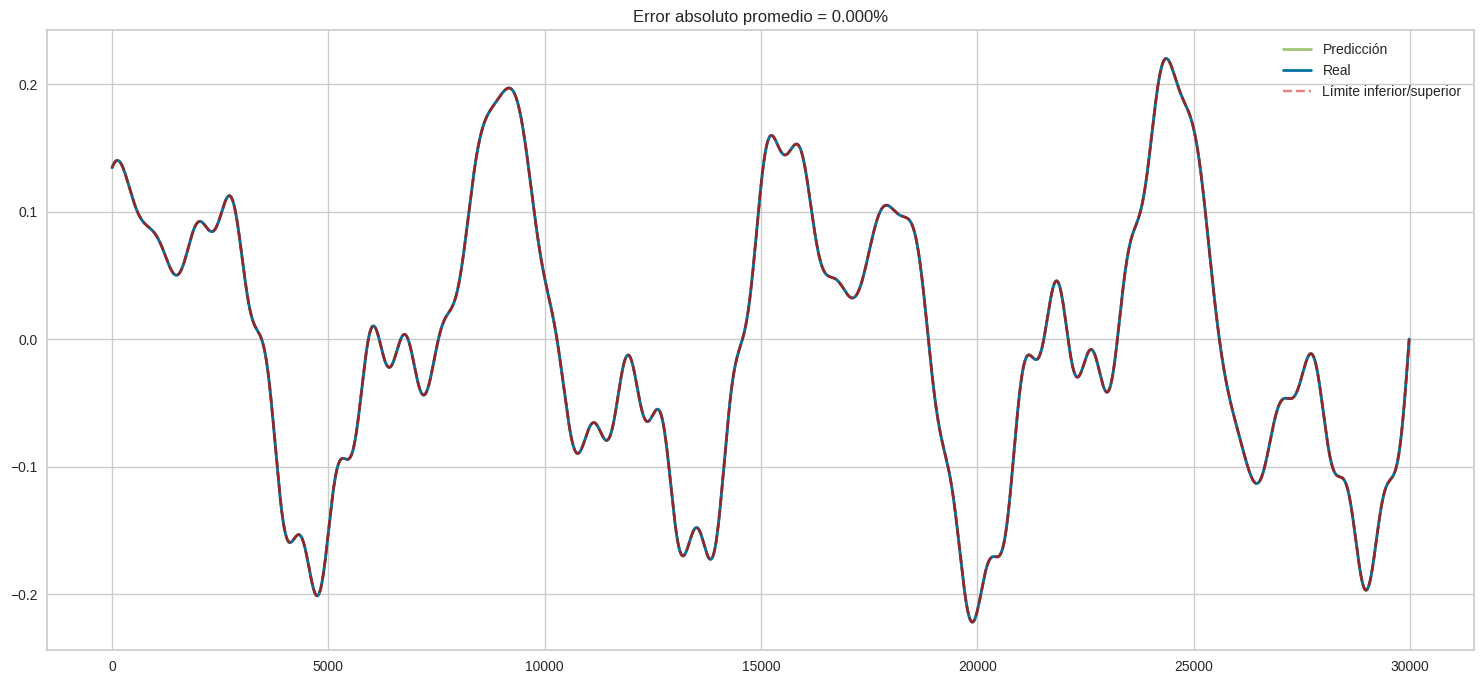

In [ ]:
data4 = pd.DataFrame(data[7].copy())
data4.columns= ['y']
for i in range(6,50):
  data4['lag_{}'.format(i)] = data4.y.shift(i)

tscv = TimeSeriesSplit(n_splits=5)
#Preprocesamiento
y = data4.dropna().y
X = data4.dropna().drop(['y'], axis = 1)
#30% para pruebas
X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,0.3)
lr4 = LinearRegression()
model = lr4.fit(X_train,y_train)
plot_lr_ts(lr4, X_train, X_test,y_train,y_test, plot_intervals=True)


3.
3.jpg

https://bit.ly/46giUrt

student.txt

[ ]
12345
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
[ ]
  1
  2
text = open("student.txt", "r")
print(text.read())
account_circle
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

a) Cargar datos
[ ]
  1
  2
data = pd.read_csv('student-mat.csv', sep=';', header=0)
data.head()
account_circle

b) Preprocesaiento
[ ]
  1
  2
  3
  4
  5
# Verifica si hay datos faltantes en columnas
missing_values = data.isnull().sum()

# Muestra la cantidad de datos faltantes por columna
print(missing_values)
account_circle
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
[ ]
  1
  2
  3
  4
  5
# Variables independientes (X): columnas 1 a 30
X = data.iloc[:, :30]

# Variable dependiente (y): columna 31 G1 - first period grade (numeric: from 0 to 20)
y = data.iloc[:, 30]
[ ]
  1
X.head()
account_circle

[ ]
  1
  2
# Codificación one-hot para las columnas con más de dos etiquetas
X = pd.get_dummies(data, columns=['Mjob', 'Fjob', 'reason', 'guardian'])
[ ]
  1
  2
  3
  4
  5
  6
# Mapeo para las demás columnas binarias
binary_mapping = {'GP': 0, 'MS': 1, 'F': 0, 'M': 1, 'U': 0, 'R': 1, 'LE3': 0, 'GT3': 1, 'T': 0, 'A': 1}
binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']

# Aplicar el mapeo a las columnas binarias
X[binary_columns] = X[binary_columns].apply(lambda x: x.map(binary_mapping))
[ ]
  1
  2
  3
  4
  5
# Mapeo para las columnas con "yes" y "no"
yes_no_mapping = {'yes': 1, 'no': 0}

columns_to_map = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
X[columns_to_map] = X[columns_to_map].apply(lambda x: x.map(yes_no_mapping))
[ ]
  1
  2
  3
  4
  5
  6
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Columnas numéricas
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                   'goout', 'Dalc', 'Walc', 'health', 'absences']
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
[ ]
  1
X.head()
account_circle

[ ]
  1
X.info()
account_circle
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    float64
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    float64
 7   Fedu               395 non-null    float64
 8   traveltime         395 non-null    float64
 9   studytime          395 non-null    float64
 10  failures           395 non-null    float64
 11  schoolsup          395 non-null    int64  
 12  famsup             395 non-null    int64  
 13  paid               395 non-null    int64  
 14  activities         395 non-null    int64  
 15  nursery            395 non-null    int64  
 16  higher             395 non-null    int64  
 17  internet           395 non-null    int64  
 18  romantic           395 non-null    int64  
 19  famrel             395 non-null    float64
 20  freetime           395 non-null    float64
 21  goout              395 non-null    float64
 22  Dalc               395 non-null    float64
 23  Walc               395 non-null    float64
 24  health             395 non-null    float64
 25  absences           395 non-null    float64
 26  G1                 395 non-null    int64  
 27  G2                 395 non-null    int64  
 28  G3                 395 non-null    int64  
 29  Mjob_at_home       395 non-null    uint8  
 30  Mjob_health        395 non-null    uint8  
 31  Mjob_other         395 non-null    uint8  
 32  Mjob_services      395 non-null    uint8  
 33  Mjob_teacher       395 non-null    uint8  
 34  Fjob_at_home       395 non-null    uint8  
 35  Fjob_health        395 non-null    uint8  
 36  Fjob_other         395 non-null    uint8  
 37  Fjob_services      395 non-null    uint8  
 38  Fjob_teacher       395 non-null    uint8  
 39  reason_course      395 non-null    uint8  
 40  reason_home        395 non-null    uint8  
 41  reason_other       395 non-null    uint8  
 42  reason_reputation  395 non-null    uint8  
 43  guardian_father    395 non-null    uint8  
 44  guardian_mother    395 non-null    uint8  
 45  guardian_other     395 non-null    uint8  
dtypes: float64(13), int64(16), uint8(17)
memory usage: 96.2 KB
c) Separación datos
[ ]
  1
  2
  3
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
account_circle
((316, 46), (79, 46), (316,), (79,))
d) Entrenamiento y Accuracy con KNN
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
from sklearn.neighbors import KNeighborsClassifier

# Probar con dos valores diferentes de k
k_values = [2,5,9,]

for k in k_values:
    # Inicializar el clasificador k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    knn_classifier.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn_classifier.predict(X_test)

    # Calcular y mostrar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy para k={k}: {accuracy}')
account_circle
Accuracy para k=2: 0.31645569620253167
Accuracy para k=5: 0.3924050632911392
Accuracy para k=9: 0.379746835443038
e) XGBoost
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Para codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Clasificador XGBoost
xgb_classifier = xgb.XGBClassifier()
# Entrenamiento
xgb_classifier.fit(X_train, y_train_encoded)

# Transformar las etiquetas de clase en valores secuenciales en el conjunto de prueba
y_test_common_classes = y_test[y_test.isin(label_encoder.classes_)]
y_test_encoded = label_encoder.transform(y_test_common_classes)

# Predicciones
y_pred = xgb_classifier.predict(X_test.loc[y_test.isin(label_encoder.classes_)])

# Precisión del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy del modelo XGBoost: {accuracy}')
account_circle
Accuracy del modelo XGBoost: 0.9743589743589743
XGBoost si funcionó para determinar las calificaciones del primer periodo en base a las demás características.

Con KNN se probó con k´s más altas pero el accuracy no mejoraba, el más alto fue:

Accuracy para k=5: 0.3924050632911392

Pero esto para nada es un buen accuracy, no sabe clasificar y al parecer no puede agrupar por calificaciones similares en base a las características.

8.
8.jpg

https://bit.ly/40H9cxp

[ ]
  1

5.
5.1.png

https://bit.ly/3Qxzg9e

[ ]
  1
  2
  3
  4
  5
  6
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
a) Cargar datos
[ ]
  1
  2
readme = open("readme.txt", "r")
print(readme.read())
account_circle
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

=======
Format:
=======
sentence \t score \n


=======
Details:
=======
Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.



For the full datasets look:

imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'
amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'
yelp: Yelp dataset challenge http://www.yelp.com/dataset_challenge

[ ]
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
def cargar_datos(archivo):
  """ Función para cargar cada archivo txt
      frases: almacena las frase
      etiquetas: almacena las etiquetas
  """
  frases = []
  etiquetas = []
  with open(archivo, 'r') as file:
    for linea in file:
      frase, etiqueta = linea.strip().split('\t')
      frases.append(frase)
      etiquetas.append(int(etiqueta))
  return frases, etiquetas
[ ]
  1
  2
  3
amazon_frases, amazon_etiquetas = cargar_datos("amazon_cells_labelled.txt")
imdb_frases, imdb_etiquetas = cargar_datos("imdb_labelled.txt")
yelp_frases, yelp_etiquetas = cargar_datos("yelp_labelled.txt")
b) Separar conjuntos en train y test
[ ]
  1
  2
  3
  4
  5
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(amazon_frases, amazon_etiquetas, test_size=0.2, random_state=123)

X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(imdb_frases, imdb_etiquetas, test_size=0.2, random_state=123)

X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(yelp_frases, yelp_etiquetas, test_size=0.2, random_state=123)
c) Aplicar BoW
El proceso de Bag of Words (BoW) se aplica a través del uso de la clase CountVectorizer de scikit-learn.

[ ]
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
vec = CountVectorizer()

# Amazon
X_train_amazon = vec.fit_transform(X_train_amazon)
X_test_amazon = vec.transform(X_test_amazon)

#IMDB
X_train_imdb = vec.transform(X_train_imdb)
X_test_imdb = vec.transform(X_test_imdb)

#Yelp
X_train_yelp = vec.transform(X_train_yelp)
X_test_yelp = vec.transform(X_test_yelp)
d) Aplicar Bayesiano Multinominal
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
clf = MultinomialNB()

# Entrenar los clasificadores para cada wbsite
clf_amazon = clf.fit(X_train_amazon, y_train_amazon)
clf_imdb = clf.fit(X_train_imdb, y_train_imdb)
clf_yelp = clf.fit(X_train_yelp, y_train_yelp)

# Hacer predicciones en los conjuntos de prueba
pred_amazon = clf_amazon.predict(X_test_amazon)
pred_imdb = clf_imdb.predict(X_test_imdb)
pred_yelp = clf_yelp.predict(X_test_yelp)
e) Evalución Métricas
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
#Accuracy
acc_amazon = accuracy_score(y_test_amazon, pred_amazon)
acc_imdb = accuracy_score(y_test_imdb, pred_imdb)
acc_yelp = accuracy_score(y_test_yelp, pred_yelp)

print("Accuracy del clasificador de Amazon:", acc_amazon)
print("Accuracy del clasificador de IMDb:", acc_imdb)
print("Accuracy del clasificador de Yelp:", acc_yelp)
account_circle
Accuracy del clasificador de Amazon: 0.76
Accuracy del clasificador de IMDb: 0.695
Accuracy del clasificador de Yelp: 0.77
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
# Precision
p_amazon = precision_score(y_test_amazon, pred_amazon)
p_imdb = precision_score(y_test_imdb, pred_imdb)
p_yelp = precision_score(y_test_yelp, pred_yelp)

print("Precision del clasificador de Amazon:", p_amazon)
print("Precision del clasificador de IMDb:", p_imdb)
print("Precision del clasificador de Yelp:", p_yelp)
account_circle
Precision del clasificador de Amazon: 0.7789473684210526
Precision del clasificador de IMDb: 0.7738095238095238
Precision del clasificador de Yelp: 0.7920792079207921
[ ]
  1
  2
  3
  4
  5
  6
  7
  8
# Recall
recall_amazon = recall_score(y_test_amazon, pred_amazon)
recall_imdb = recall_score(y_test_imdb, pred_imdb)
recall_yelp = recall_score(y_test_yelp, pred_yelp)

print("Recall del clasificador de Amazon:", recall_amazon)
print("Recall del clasificador de IMDb:", recall_imdb)
print("Recall del clasificador de Yelp:", recall_yelp)
account_circle
Recall del clasificador de Amazon: 0.7326732673267327
Recall del clasificador de IMDb: 0.6074766355140186
Recall del clasificador de Yelp: 0.7619047619047619
[ ]
12345678
# f1 score
f1_amazon = f1_score(y_test_amazon, pred_amazon)
f1_imdb = f1_score(y_test_imdb, pred_imdb)
f1_yelp = f1_score(y_test_yelp, pred_yelp)

print("F1 Score del clasificador de Amazon:", f1_amazon)
print("F1 Score del clasificador de IMDb:", f1_imdb)
print("F1 Score del clasificador de Yelp:", f1_yelp)
account_circle
F1 Score del clasificador de Amazon: 0.7551020408163266
F1 Score del clasificador de IMDb: 0.6806282722513088
F1 Score del clasificador de Yelp: 0.7766990291262137
Haz doble clic (o pulsa Intro) para editar



# 3.
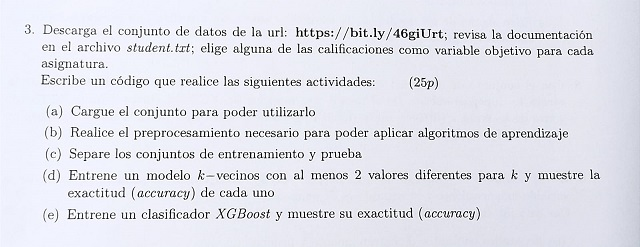

https://bit.ly/46giUrt

student.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
text = open("student.txt", "r")
print(text.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

## a) Cargar datos

In [ ]:
data = pd.read_csv('student-mat.csv', sep=';', header=0)
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## b) Preprocesaiento

In [ ]:
# Verifica si hay datos faltantes en columnas
missing_values = data.isnull().sum()

# Muestra la cantidad de datos faltantes por columna
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
# Variables independientes (X): columnas 1 a 30
X = data.iloc[:, :30]

# Variable dependiente (y): columna 31 G1 - first period grade (numeric: from 0 to 20)
y = data.iloc[:, 30]

In [ ]:
X.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     2    1    2      5        4  

[5 rows x 30 columns]

In [ ]:
# Codificación one-hot para las columnas con más de dos etiquetas
X = pd.get_dummies(data, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [ ]:
# Mapeo para las demás columnas binarias
binary_mapping = {'GP': 0, 'MS': 1, 'F': 0, 'M': 1, 'U': 0, 'R': 1, 'LE3': 0, 'GT3': 1, 'T': 0, 'A': 1}
binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']

# Aplicar el mapeo a las columnas binarias
X[binary_columns] = X[binary_columns].apply(lambda x: x.map(binary_mapping))

In [ ]:
# Mapeo para las columnas con "yes" y "no"
yes_no_mapping = {'yes': 1, 'no': 0}

columns_to_map = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
X[columns_to_map] = X[columns_to_map].apply(lambda x: x.map(yes_no_mapping))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Columnas numéricas
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                   'goout', 'Dalc', 'Walc', 'health', 'absences']
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
X.head()

school  sex       age  address  famsize  Pstatus      Medu      Fedu  \
0       0    0  1.023046        0        1        1  1.143856  1.360371   
1       0    0  0.238380        0        1        0 -1.600009 -1.399970   
2       0    0 -1.330954        0        0        0 -1.600009 -1.399970   
3       0    0 -1.330954        0        1        0  1.143856 -0.479857   
4       0    0 -0.546287        0        1        0  0.229234  0.440257   

   traveltime  studytime  ...  Fjob_other  Fjob_services  Fjob_teacher  \
0    0.792251  -0.042286  ...           0              0             1   
1   -0.643249  -0.042286  ...           1              0             0   
2   -0.643249  -0.042286  ...           1              0             0   
3   -0.643249   1.150779  ...           0              1             0   
4   -0.643249  -0.042286  ...           1              0             0   

   reason_course  reason_home  reason_other  reason_reputation  \
0              1            0             0                  0   
1              1            0             0                  0   
2              0            0             1                  0   
3              0            1             0                  0   
4              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  
0                0                1               0  
1                1                0               0  
2                0                1               0  
3                0                1               0  
4                1                0               0  

[5 rows x 46 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    float64
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    float64
 7   Fedu               395 non-null    float64
 8   traveltime         395 non-null    float64
 9   studytime          395 non-null    float64
 10  failures           395 non-null    float64
 11  schoolsup          395 non-null    int64  
 12  famsup             395 non-null    int64  
 13  paid               395 non-null    int64  
 14  activities         395 non-null    int64  
 15  nursery            395 non-null    int64  
 16  higher             395 non

## c) Separación datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 46), (79, 46), (316,), (79,))

## d) Entrenamiento y Accuracy con KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Probar con dos valores diferentes de k
k_values = [2,5,9,]

for k in k_values:
    # Inicializar el clasificador k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    knn_classifier.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn_classifier.predict(X_test)

    # Calcular y mostrar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy para k={k}: {accuracy}')

Accuracy para k=2: 0.31645569620253167
Accuracy para k=5: 0.3924050632911392
Accuracy para k=9: 0.379746835443038


## e) XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Para codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Clasificador XGBoost
xgb_classifier = xgb.XGBClassifier()
# Entrenamiento
xgb_classifier.fit(X_train, y_train_encoded)

# Transformar las etiquetas de clase en valores secuenciales en el conjunto de prueba
y_test_common_classes = y_test[y_test.isin(label_encoder.classes_)]
y_test_encoded = label_encoder.transform(y_test_common_classes)

# Predicciones
y_pred = xgb_classifier.predict(X_test.loc[y_test.isin(label_encoder.classes_)])

# Precisión del modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy del modelo XGBoost: {accuracy}')

Accuracy del modelo XGBoost: 0.9743589743589743


XGBoost si funcionó para determinar las calificaciones del primer periodo en base a las demás características.

Con KNN se probó con k´s más altas pero el accuracy no mejoraba, el más alto fue:

Accuracy para k=5: 0.3924050632911392

Pero esto para nada es un buen accuracy, no sabe clasificar y al parecer no puede agrupar por calificaciones similares en base a las características.

# 8.
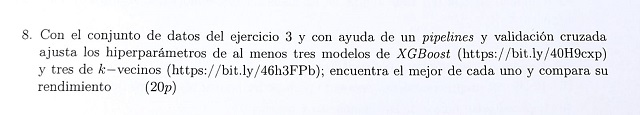

https://bit.ly/40H9cxp


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# KNN Pipeline con búsqueda de hiperparámetros
knn_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # Escalamiento como parte del pipeline
    ('classifier', GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [2, 5, 9]},
                                cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_score)))
])

# Entrenar el modelo KNN dentro del pipeline
knn_pipeline.fit(X_train, y_train)

# Obtener los mejores parámetros para KNN desde el pipeline
best_knn_params = knn_pipeline.named_steps['classifier'].best_params_

# Imprimir los mejores parámetros para KNN
print("Mejores parámetros para KNN:", best_knn_params)

Mejores parámetros para KNN: {'n_neighbors': 9}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# XGBoost Pipeline con búsqueda de hiperparámetros
xgb_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # Escalamiento como parte del pipeline
    ('classifier', GridSearchCV(xgb.XGBClassifier(),
                                param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
                                cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_score)))
])

# Para codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Entrenar el modelo XGBoost dentro del pipeline
xgb_pipeline.fit(X_train, y_train_encoded)

# Transformar las etiquetas de clase en valores secuenciales en el conjunto de prueba
y_test_common_classes = y_test[y_test.isin(label_encoder.classes_)]
y_test_encoded = label_encoder.transform(y_test_common_classes)

# Obtener los mejores parámetros para XGBoost desde el pipeline
best_xgb_params = xgb_pipeline.named_steps['classifier'].best_params_

# Imprimir los mejores parámetros para XGBoost
print("Mejores parámetros para XGBoost:", best_xgb_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros para XGBoost: {'max_depth': 3, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1467, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6

# 5.

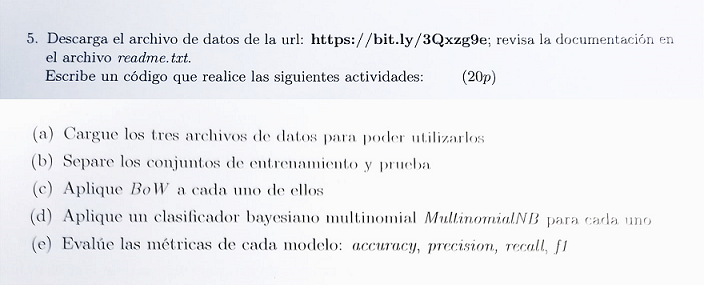

https://bit.ly/3Qxzg9e


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## a) Cargar datos

In [ ]:
readme = open("readme.txt", "r")
print(readme.read())

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

Format:
sentence \t score \n


Details:
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.



For the full datasets look:

imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'
amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'
yelp: Yelp dataset challenge 

In [ ]:
def cargar_datos(archivo):
  """ Función para cargar cada archivo txt
      frases: almacena las frase
      etiquetas: almacena las etiquetas
  """
  frases = []
  etiquetas = []
  with open(archivo, 'r') as file:
    for linea in file:
      frase, etiqueta = linea.strip().split('\t')
      frases.append(frase)
      etiquetas.append(int(etiqueta))
  return frases, etiquetas

In [ ]:
amazon_frases, amazon_etiquetas = cargar_datos("amazon_cells_labelled.txt")
imdb_frases, imdb_etiquetas = cargar_datos("imdb_labelled.txt")
yelp_frases, yelp_etiquetas = cargar_datos("yelp_labelled.txt")

## b) Separar conjuntos en train y test

In [ ]:
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(amazon_frases, amazon_etiquetas, test_size=0.2, random_state=123)

X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(imdb_frases, imdb_etiquetas, test_size=0.2, random_state=123)

X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(yelp_frases, yelp_etiquetas, test_size=0.2, random_state=123)

## c) Aplicar BoW

El proceso de Bag of Words (BoW) se aplica a través del uso de la clase CountVectorizer de scikit-learn.

In [ ]:
vec = CountVectorizer()

# Amazon
X_train_amazon = vec.fit_transform(X_train_amazon)
X_test_amazon = vec.transform(X_test_amazon)

#IMDB
X_train_imdb = vec.transform(X_train_imdb)
X_test_imdb = vec.transform(X_test_imdb)

#Yelp
X_train_yelp = vec.transform(X_train_yelp)
X_test_yelp = vec.transform(X_test_yelp)

## d) Aplicar Bayesiano Multinominal

In [ ]:
clf = MultinomialNB()

# Entrenar los clasificadores para cada wbsite
clf_amazon = clf.fit(X_train_amazon, y_train_amazon)
clf_imdb = clf.fit(X_train_imdb, y_train_imdb)
clf_yelp = clf.fit(X_train_yelp, y_train_yelp)

# Hacer predicciones en los conjuntos de prueba
pred_amazon = clf_amazon.predict(X_test_amazon)
pred_imdb = clf_imdb.predict(X_test_imdb)
pred_yelp = clf_yelp.predict(X_test_yelp)

# e) Evalución Métricas

In [ ]:
#Accuracy
acc_amazon = accuracy_score(y_test_amazon, pred_amazon)
acc_imdb = accuracy_score(y_test_imdb, pred_imdb)
acc_yelp = accuracy_score(y_test_yelp, pred_yelp)

print("Accuracy del clasificador de Amazon:", acc_amazon)
print("Accuracy del clasificador de IMDb:", acc_imdb)
print("Accuracy del clasificador de Yelp:", acc_yelp)

Accuracy del clasificador de Amazon: 0.76
Accuracy del clasificador de IMDb: 0.695
Accuracy del clasificador de Yelp: 0.77


In [ ]:
# Precision
p_amazon = precision_score(y_test_amazon, pred_amazon)
p_imdb = precision_score(y_test_imdb, pred_imdb)
p_yelp = precision_score(y_test_yelp, pred_yelp)

print("Precision del clasificador de Amazon:", p_amazon)
print("Precision del clasificador de IMDb:", p_imdb)
print("Precision del clasificador de Yelp:", p_yelp)

Precision del clasificador de Amazon: 0.7789473684210526
Precision del clasificador de IMDb: 0.7738095238095238
Precision del clasificador de Yelp: 0.7920792079207921


In [ ]:
# Recall
recall_amazon = recall_score(y_test_amazon, pred_amazon)
recall_imdb = recall_score(y_test_imdb, pred_imdb)
recall_yelp = recall_score(y_test_yelp, pred_yelp)

print("Recall del clasificador de Amazon:", recall_amazon)
print("Recall del clasificador de IMDb:", recall_imdb)
print("Recall del clasificador de Yelp:", recall_yelp)

Recall del clasificador de Amazon: 0.7326732673267327
Recall del clasificador de IMDb: 0.6074766355140186
Recall del clasificador de Yelp: 0.7619047619047619


In [ ]:
# f1 score
f1_amazon = f1_score(y_test_amazon, pred_amazon)
f1_imdb = f1_score(y_test_imdb, pred_imdb)
f1_yelp = f1_score(y_test_yelp, pred_yelp)

print("F1 Score del clasificador de Amazon:", f1_amazon)
print("F1 Score del clasificador de IMDb:", f1_imdb)
print("F1 Score del clasificador de Yelp:", f1_yelp)

F1 Score del clasificador de Amazon: 0.7551020408163266
F1 Score del clasificador de IMDb: 0.6806282722513088
F1 Score del clasificador de Yelp: 0.7766990291262137


#4

♢ Con x0 = [27, 35]^T
, suponiendo que existen tres propietarios y que
$π_{1,1}$ = 0.5, $π_{1,2}$ = 0.3,
$π_{2,1}$ = 0.3, $π_{2,2}$ = 0.4, $π_{3,1}$ = 0.4 y $π_{3,2}$ = 0.5:
• Calcula Pr (x0|y0 = Pk) para k = 1, 2, 3 y determina la predicción:
$$\hat{y}_0 = arg max \{Pr (x0|y0 = P_1),Pr (x0|y0 = P_2),Pr (x0|y0 = P_3)\}$$




Sabemos que $$Pr(x0|y0 = P_k) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{k,1}^{x_{0,1}}\times \dots \times \pi_{k,1}^{x_{0,n}} $$
$$
= \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\Pi_{i=1}^{n}\pi_{k,1}^{x_{0,i}}$$

En nuestro caso tenemos que:
$$
Pr(x0|y0 = P_1) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{1,1}\times\pi_{1,2}
$$

$$
Pr(x0|y0 = P_2) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{2,1}\times\pi_{2,2}
$$

$$
Pr(x0|y0 = P_3) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{3,1}\times\pi_{3,2}
$$

De donde:
$$
Pr(x0|y0 = P_1) = \frac{(27+35)!}{27!\times35!}\pi_{1,1}\times\pi_{1,2}
$$

$$
Pr(x0|y0 = P_2) = \frac{(27+35)!}{27!\times35!}\pi_{2,1}\times\pi_{2,2}
$$

$$
Pr(x0|y0 = P_3) = \frac{(27+35)!}{27!\times35!}\pi_{3,1}\times\pi_{3,2}
$$

Asi:
$$
Pr(x0|y0 = P_1) = \frac{(27+35)!}{27!\times35!}0.15
$$

$$
Pr(x0|y0 = P_2) = \frac{(27+35)!}{27!\times35!}0.12
$$

$$
Pr(x0|y0 = P_3) = \frac{(27+35)!}{27!\times35!}0.20
$$


Por lo tanto:
$$
Pr(x0|y0 = P_1) = 1.04259\times10^{-9}
$$

$$
Pr(x0|y0 = P_2) = 2.625\times10^{-20}
$$

$$
Pr(x0|y0 = P_3) = 1.47\times10^{-4}$$

$$
\therefore \hat{y}_0 = P3$$
**nota: Aplicando el argmax al conjunto de las 3 anteriores (contando desde el indice 0)**

# 2
♢ Demuestra que para 0 < $\alpha$ < 1, se cumple que $1=\sum_{i=1}^\infty \alpha(1-\alpha)^{i-1}$



*Solución*: Usando el **criterio de convergencia** de series geométricas:

 Si $ \sum_{i=1}^\infty \alpha \, r^{i-1} $, donde $|r|<1$, entonces la serie converge a $\frac{\alpha}{1-r}$

Vemos que $|r|=|1-\alpha| <1$, pues $\alpha<1$, entonces por el criterio se converge a:
$$ \frac{\alpha}{1-(1-\alpha)}=\frac{\alpha}{\alpha}=1$$

O sea que $\sum_{i=1}^\infty \alpha(1-\alpha)^{i-1}=1$

# 6

♦ Verificar que $\hat{\mu}_n = (1 − \alpha)^{n−t} \,\hat{\mu}_{n-1} + \alpha y_n$ se obtiene a partir de $\hat{\mu}_n = \sum_{t=1}^n w_t y_t $



*Solución*:

  Por definición se sabe que $w_t = \alpha(1-\alpha)^{n-t}, \, t\in\{1,\cdots, n\}$

Entonces $\hat{\mu}_{n}= \sum_{t=1}^{n} w_t y_t = \sum_{t=1}^{n} \alpha(1-\alpha)^{n-t}\; y_t \\= \alpha(1-\alpha)^{n-1}\; y_1 + \alpha(1-\alpha)^{n-2}\; y_2 + \cdots + \alpha(1-\alpha)\; y_{n-1} + \alpha\, y_{n} \\=  \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-t}y_t \; +\; \alpha y_n \\= (1-\alpha)\sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-1-t}y_t \; +\; \alpha y_n$

  Además $\hat{\mu}_{n-1}= \sum_{t=1}^{n-1} w_t y_t = \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-1-t}\; y_t$

  Entonces $\hat{\mu}_{n}= (1-\alpha)\,\hat{\mu}_{n-1} + \alpha y_n$

#9)Regresión polinomial

 https://bit.ly/40DjBdm

In [ ]:
import pandas as pd
datos_poli = pd.read_csv('poly_reg.csv', header=None)
datos_poli.head()

0         1
0  9.146387  2.157051
1  5.252080  1.439474
2  0.633026 -2.323591
3  3.176071  1.072194
4  2.091358 -0.265403

In [ ]:
x = np.array(datos_poli[0]).reshape(-1,1)
y = np.array(datos_poli[1])
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2)

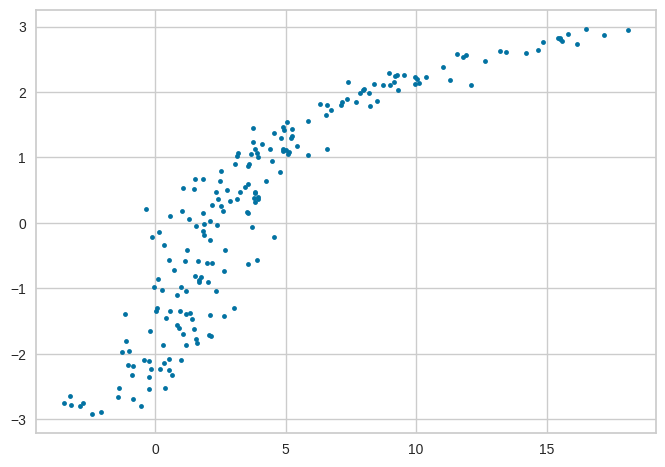

In [ ]:

plt.plot(x,y,'b.');

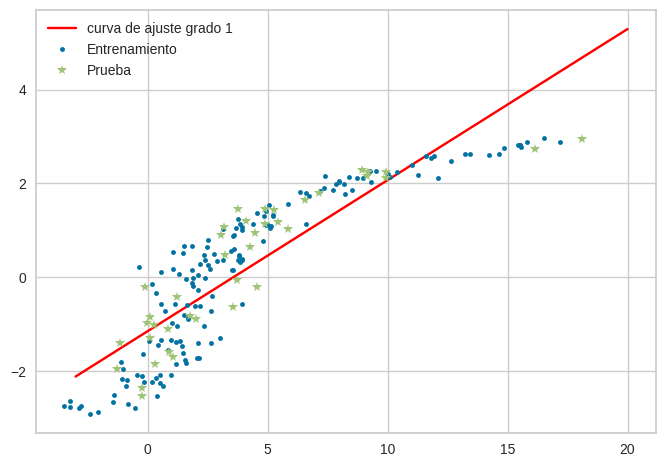

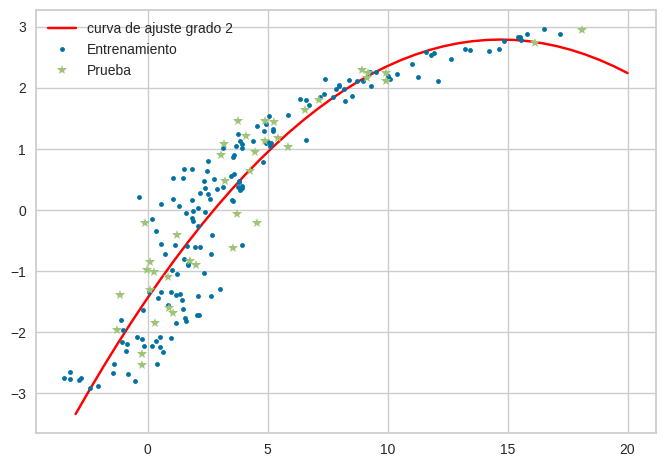

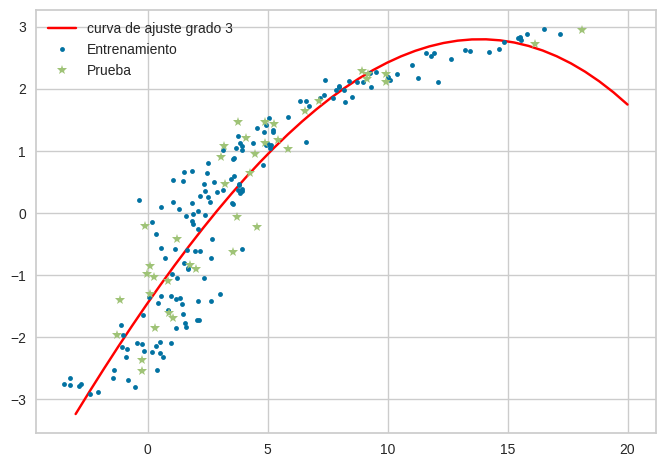

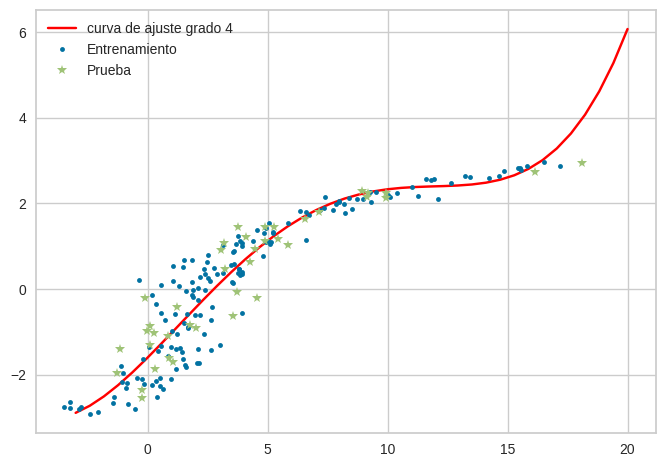

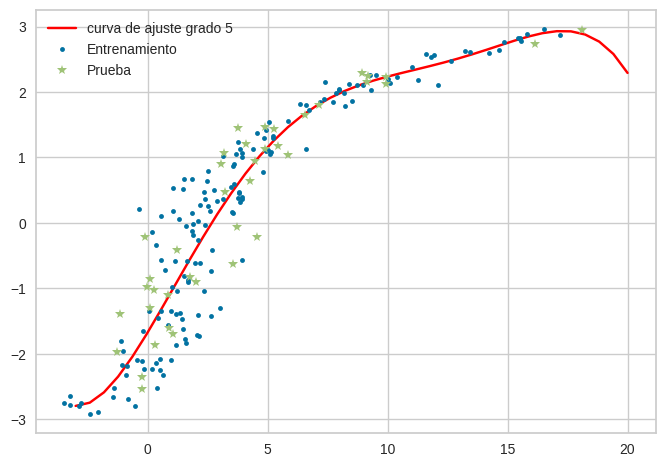

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
def poly_reg(degree,x_train,x_test,y_train,y_test,plot=False):
  test_size = y_test.shape[0]
  x_new = np.linspace(-3,20,test_size).reshape(test_size,1)
  pipe_poly = make_pipeline(
      PolynomialFeatures(degree=degree,include_bias=False),
      LinearRegression()
  )
  pipe_poly.fit(x_train,y_train)
  y_new_pred = pipe_poly.predict(x_test)
  if plot:
    plt.plot(x_new,pipe_poly.predict(x_new),label=f'curva de ajuste grado {degree}',c='red')
    plt.plot(x_train,y_train,'b.',label='Entrenamiento')
    plt.plot(x_test,y_test,'g*',label='Prueba')
    plt.legend(loc='best')
    plt.show()
  r2 = r2_score(y_test,y_new_pred)
  rmse = mean_squared_error(y_test,y_new_pred)
  return (r2,rmse)
error = []
for i in range(1, 6):
  error.append(poly_reg(i,x_train,x_test,y_train,y_test,plot=True))

In [ ]:
error

[(0.7520329708512563, 0.5760220760637127),
 (0.8663312579846906, 0.31050961309173475),
 (0.8636473007175184, 0.31674438810359906),
 (0.8573793004466543, 0.3313048179364914),
 (0.8640125182471319, 0.31589599563648363)]

El que cuenta con el error cuadratico más pequeño es el polinomio cuadrado. El error cuadratico es el de la segunda columna, por lo tanto, el primero es el más bajo y el que menos error tiene.  

Por lo tanto, el mejor es el cuadratico